In [17]:
print("hello world")

hello world


# 第三章学习

## ⽮量化加速

In [18]:
%matplotlib inline
import math
import time
import numpy as np
import torch
# from d2l import torch as d2l
n=1000
a = torch.ones(n)
b = torch.ones(n)


In [19]:
class Timer:
    def __init__(self) -> None:
        self.times = []
        self.tik = None
        self.start()
    def start(self):
        self.tik = time.time()
    def end(self):
        gap = time.time()-self.tik
        self.times.append(gap)
        return self.times[-1]
    def avg(self):
        n = len(self.times)
        return sum(self.times)/n
    def sum(self):
        return sum(self.times)
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [20]:
timer = Timer()
c = a+b
print(f'{timer.end():.6f} sec')
print('----------')

0.000000 sec
----------


In [21]:
timer.start()
for i in range(len(a)):
    c[i] = a[i]+b[i]
print(f'{timer.end():.6f} sec')

0.016258 sec


## 正态分布与平⽅损失
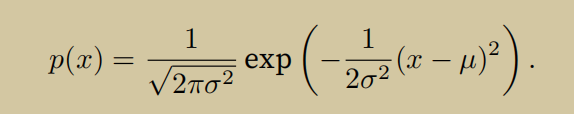

In [22]:
def normal(x,mu,sigma):
    parameter = 1/math.sqrt(2*math.pi*sigma**2)
    right = np.exp(-1/(2*sigma**2)*(x-mu)**2)
    return parameter*right

3.7.1


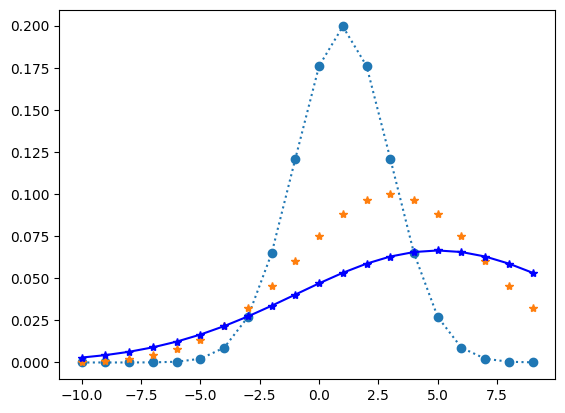

In [23]:
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
plt.plot(x,normal(x,1,2),'o:',x,normal(x,3,4), '*',x,normal(x,5,6), '*-b')


In [9]:
# from gxl_tools import init_data_normal
# from matplotlib import pyplot as plt
# Y = init_data_normal(100,20,(13))
# plt.plot(init_data_normal(50,0.1,(1000)),list(range(1,1001)),'*')
# plt.show()

## 线性回归的从零开始实现

In [24]:
import random
def makeData(w,b,nums):
    X = torch.normal(0,1,(nums,len(w)))
    Y = torch.matmul(X,w)+b
    Y += torch.normal(0,0.01,Y.shape)
    return X,Y.reshape(-1,1)
true_w = torch.tensor([31.4,-66.6])
true_b = 4.4
features,labels = makeData(true_w,true_b,1000)
print(features[0:3])
print(labels[0:3])


tensor([[-1.2342,  0.9973],
        [-0.8703, -0.3707],
        [ 0.0016, -0.3190]])
tensor([[-100.7790],
        [   1.7676],
        [  25.6955]])


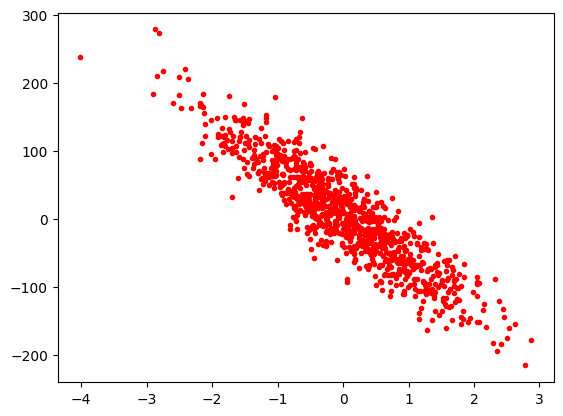

In [25]:
plt.plot(features[:,1],labels,".r")

In [26]:
def data_iter(batch_size, features, labels):
    num = len(features)
    indices = list(range(num))
    random.shuffle(indices)
    for i in range(0,num,batch_size):
        indices_batch = torch.tensor(indices[i:min(i+batch_size,num)])
        yield features[indices_batch],labels[indices_batch]

for batch_features,batch_labels in data_iter(10,features,labels):
    print (batch_features,batch_labels)

tensor([[ 0.7713,  0.0050],
        [-1.9081, -0.2554],
        [-0.1723,  0.7448],
        [-0.7320,  0.3838],
        [ 0.0826,  1.1283],
        [-0.5191,  1.5776],
        [ 0.4619,  0.9246],
        [ 1.5239, -0.7227],
        [ 0.6112, -1.4770],
        [ 0.5884,  2.0520]]) tensor([[  28.2910],
        [ -38.5080],
        [ -50.6194],
        [ -44.1508],
        [ -68.1517],
        [-116.9573],
        [ -42.6688],
        [ 100.3898],
        [ 121.9619],
        [-113.7887]])
tensor([[-0.4667, -0.4987],
        [-0.0311, -0.1604],
        [-0.2928, -0.4103],
        [-0.5851,  1.1278],
        [ 1.1507, -0.3986],
        [-0.7528,  0.3287],
        [-0.8902,  0.8427],
        [-1.4289,  1.1008],
        [-0.0715,  0.1482],
        [ 2.8170,  1.3625]]) tensor([[  22.9648],
        [  14.0883],
        [  22.5376],
        [ -89.0793],
        [  67.0640],
        [ -41.1242],
        [ -79.6813],
        [-113.7832],
        [  -7.7335],
        [   2.1093]])
tensor([[-0.9451

## 初始化模型参数,模型，损失值，优化函数

In [27]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
def line_mode(X,w,b):
    return torch.matmul(X,w)+b
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.size()))**2/2
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad /batch_size #。因为我们计算的损失是⼀个批量样本的总和，所以我们⽤批量⼤⼩（batch_size）来规范化步⻓，这样步⻓⼤⼩就不会取决于我们对批量⼤⼩的选择
            param.grad.zero_()

In [6]:
import gxl_tools
gxl_tools.gxl.sayHi()
# gxl_tools.gxl1.sayHi()

hi i am gengxuelong


11.045361017187261

In [28]:
lr = 0.03
epochs_num = 3
batch_size = 10
net = line_mode
loss = squared_loss
opimize = sgd

for epoch in range(epochs_num):
    for features_b,labels_b in data_iter(batch_size,features,labels):
        Y_hat = net(features_b,w,b)
        loss_value = loss(Y_hat,labels_b)
        loss_value.sum().backward() # w b的导数是关于损失函数的
        opimize([w,b],lr,batch_size)
    with torch.no_grad():
        loss_batch = loss(net(features,w,b),labels).sum()
        print(f'epoch {epoch+1} loss : {loss_batch:5f}')

print(f'now w: {w}')
print(f'now b: {b}')
print(true_w,true_b)

epoch 1 loss : 5906.208984
epoch 2 loss : 13.081743
epoch 3 loss : 0.083384
now w: tensor([[ 31.3975],
        [-66.5923]], requires_grad=True)
now b: tensor([4.3997], requires_grad=True)
tensor([ 31.4000, -66.6000]) 4.4


## 线性回归的简洁实现

In [29]:
from torch.utils import data
true_w = torch.tensor([44.4,22.2])
true_b = 11.1
features,labels = makeData(true_w,true_b,1000)
def load_array(data_arrays,batch_size,is_train=True):
    return data.DataLoader(data.TensorDataset(*data_arrays),batch_size,shuffle=is_train)
batch_size = 10
data_iter = load_array((features,labels),batch_size)
next(iter(data_iter))

[tensor([[-0.2805,  0.5546],
         [-0.8039, -2.0244],
         [-0.3802, -0.6239],
         [-0.9546,  0.3177],
         [-0.3251,  0.5463],
         [ 0.2281, -0.2973],
         [-0.0170,  1.4204],
         [ 0.6170,  1.0652],
         [-0.9405,  0.1661],
         [-0.0689,  1.0498]]),
 tensor([[ 10.9493],
         [-69.5271],
         [-19.6310],
         [-24.2303],
         [  8.8057],
         [ 14.6203],
         [ 41.8790],
         [ 62.1375],
         [-26.9778],
         [ 31.3655]])]

In [30]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss()
optimize = torch.optim.SGD(net.parameters(),lr=0.03)

epochs = 3
print(f'now w: {net[0].weight.data}')
print(f'now b: {net[0].bias.data}')
for epoch in range(epochs):
    for x,y in data_iter:
        loss_value = loss(net(x),y)
        optimize.zero_grad()
        loss_value.backward()
        optimize.step()
        
    with torch.no_grad():
        loss_value = loss(net(features),labels)
        print(f'epoch {epoch+1} loss: {loss_value:5f} ')
    print(f'now w: {net[0].weight.data}')
    print(f'now b: {net[0].bias.data}')
print(f'true w and b:{true_w} {true_b}')

now w: tensor([[0.0010, 0.0039]])
now b: tensor([0.])
epoch 1 loss: 0.006288 
now w: tensor([[44.3305, 22.1687]])
now b: tensor([11.0862])
epoch 2 loss: 0.000109 
now w: tensor([[44.4008, 22.1993]])
now b: tensor([11.1003])
epoch 3 loss: 0.000108 
now w: tensor([[44.4003, 22.2003]])
now b: tensor([11.1005])
true w and b:tensor([44.4000, 22.2000]) 11.1


In [7]:
# import gxl_tools
# gxl_tools.gxl1.sayHi()

In [31]:
from torch import nn
from torch.utils import data
import torch
# import math
def make_data(w,b,size):
    X = torch.normal(0,0.1,(size,len(w)))
    y = torch.matmul(X,w)
    y += b
    y += torch.normal(0,0.001,y.size())
    return X,y.reshape(-1,1)
net = nn.Sequential(nn.Linear(2,1))
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)
true_w = torch.tensor([31.4,22.2])
true_b = 111.1
features,labels = make_data(true_w,true_b,1000)
data_iter = data.DataLoader(data.TensorDataset(features,labels),10,shuffle=True)#TensorDataset
loss = nn.MSELoss(reduction='mean')
optimize = torch.optim.SGD(net.parameters(),lr=0.3)# lr
epochs = 21
for epoch in range(epochs):
    for X,y in data_iter:
        loss_value = loss(net(X),y)
        optimize.zero_grad()
        loss_value.backward()
        optimize.step()# optimize 是对象，不是函数，step()
    loss_all_value = loss(net(features),labels)
    print(f'epoch {epoch} loss: {loss_all_value}')
    print(f'now w and b: {net[0].weight.data} ;{net[0].bias.data}')
    print(f'true w and b: {true_w} ;{true_b}')
    print(f'误差:w:{abs(net[0].weight.data-true_w)/true_w} b:{abs(net[0].bias.data-true_b)/true_b}')

epoch 0 loss: 5.118958950042725
now w and b: tensor([[12.8004, 12.9103]]) ;tensor([111.8780])
true w and b: tensor([31.4000, 22.2000]) ;111.1
误差:w:tensor([[0.5923, 0.4185]]) b:tensor([0.0070])
epoch 1 loss: 1.3019497394561768
now w and b: tensor([[21.3297, 17.3072]]) ;tensor([111.0651])
true w and b: tensor([31.4000, 22.2000]) ;111.1
误差:w:tensor([[0.3207, 0.2204]]) b:tensor([0.0003])
epoch 2 loss: 0.3966169059276581
now w and b: tensor([[25.9842, 19.6536]]) ;tensor([111.2534])
true w and b: tensor([31.4000, 22.2000]) ;111.1
误差:w:tensor([[0.1725, 0.1147]]) b:tensor([0.0014])
epoch 3 loss: 0.1120220273733139
now w and b: tensor([[28.4843, 20.8549]]) ;tensor([111.0258])
true w and b: tensor([31.4000, 22.2000]) ;111.1
误差:w:tensor([[0.0929, 0.0606]]) b:tensor([0.0007])
epoch 4 loss: 0.033704839646816254
now w and b: tensor([[29.8363, 21.5055]]) ;tensor([111.1566])
true w and b: tensor([31.4000, 22.2000]) ;111.1
误差:w:tensor([[0.0498, 0.0313]]) b:tensor([0.0005])
epoch 5 loss: 0.0086816688999

In [32]:
class Gxl:
    def __init__(self) -> None:
        self.a = 123
    def __call__(self,x=3):
        print(self.a,x,'hahahaha')
g = Gxl()
g(132)

123 132 hahahaha


## softmax回归

In [33]:
import torchvision
import torch
from torch.utils import data
from torchvision import transforms

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='../data',train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='../data',train=False,transform=trans,download=True)
print(len(mnist_train),len(mnist_test))

60000 10000


In [34]:
print(mnist_train[4343][1])

4


In [35]:
def get_fashion_mnist_labels(labels):
    """返回标签的文本标签列表"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
# print(get_fashion_mnist_labels(mnist_train[:][1]))
print(mnist_train) # dataset 对象

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [36]:
features,labels = make_data(true_w,true_b,1000)
dataset = (features,labels)
print(dataset[1])
print(dataset[0])

tensor([[110.9177],
        [104.9193],
        [111.3471],
        [108.4365],
        [106.5428],
        [112.0518],
        [110.0231],
        [113.2925],
        [109.1428],
        [109.5857],
        [113.8621],
        [106.4579],
        [107.3978],
        [109.4442],
        [113.7100],
        [107.3403],
        [107.1262],
        [107.1535],
        [106.9799],
        [111.0846],
        [105.8752],
        [117.6832],
        [113.4997],
        [114.5615],
        [112.3020],
        [112.0219],
        [112.6550],
        [107.8004],
        [106.0534],
        [115.3605],
        [115.5130],
        [111.5635],
        [107.8996],
        [108.1198],
        [110.6870],
        [108.5011],
        [116.4902],
        [117.4245],
        [117.9229],
        [111.5789],
        [109.9984],
        [109.0513],
        [121.6192],
        [108.4895],
        [110.9999],
        [111.8087],
        [114.9739],
        [109.6667],
        [110.3233],
        [112.3287],


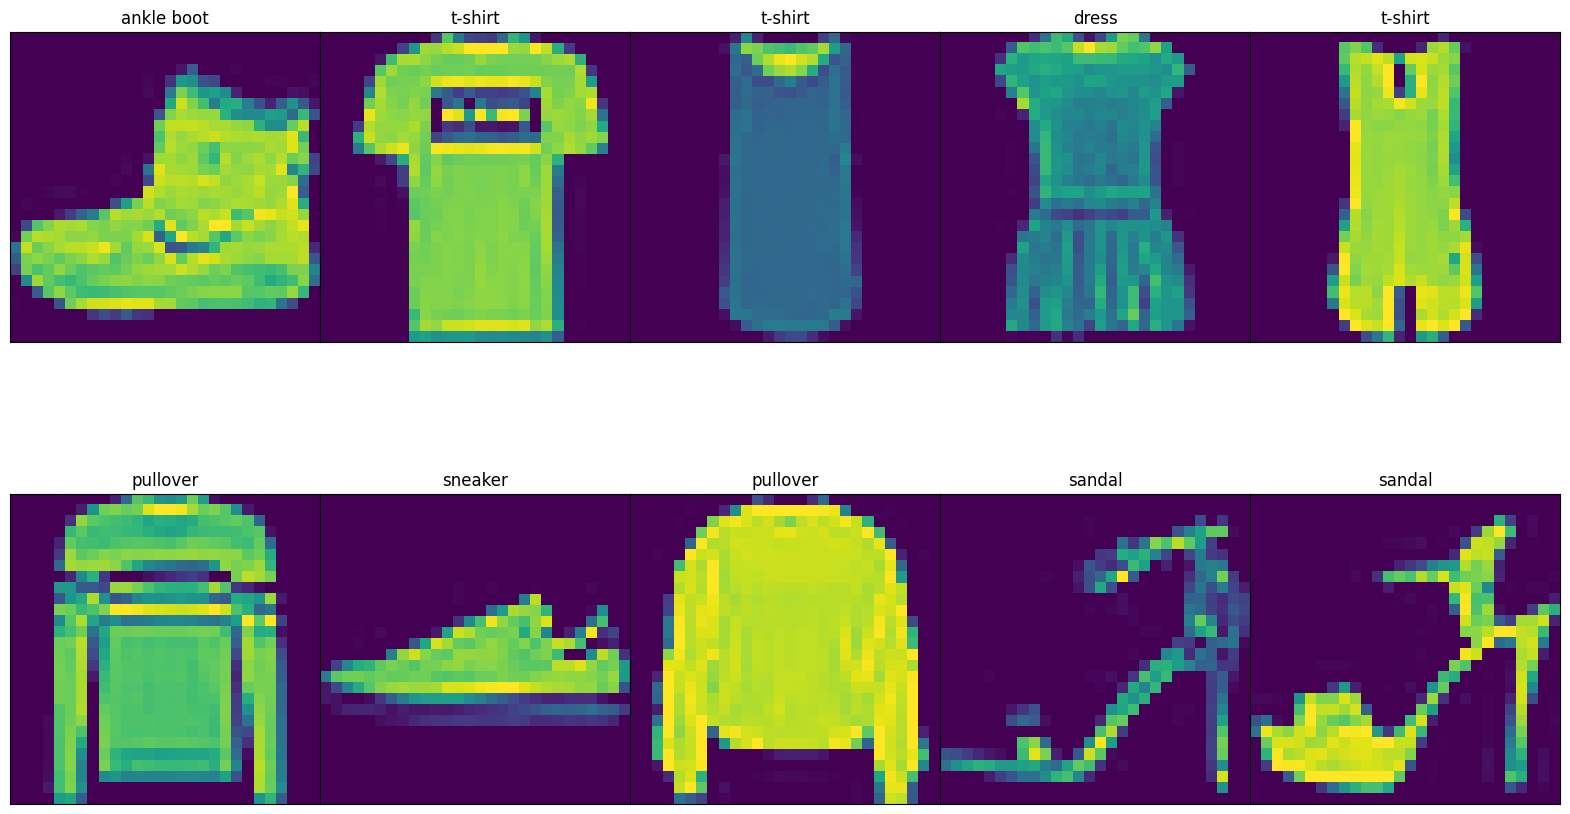

In [37]:
# import PIL.Image as image
# def get_fashion_mnist_label_for_one(label):
#     """返回标签的文本标签列表"""
#     text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
#     return text_labels[int(label)] 
# a = image.open('./小龙龙.jpg')
# a.show()
# ten = mnist_test[1][0][0]
# b = np.array(ten)
# plt.imshow(b)
# plt.show()
# plt.figure()#Figure fig = plt.figure() : 可以解释为画布。 画图的第一件事，就是创建一个画布figure，然后在这个画布上加各种元素。
# for i in range(1,33):
#     plt.subplot(4,8,i)
#     plt.imshow(mnist_test[i][0][0])
#     plt.xticks([])
#     plt.yticks([])
#     plt.title(get_fashion_mnist_label_for_one(mnist_test[i][1]))
# plt.show()
# X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
# print(X.size())

def show_image_for_arrays(image_arrays,labels,col_num):
    num = len(image_arrays)
    row_num = math.ceil(num/col_num)
    text_labels = get_fashion_mnist_labels(labels)
    plt.figure(figsize=(20,6*row_num))
    for i in range(1,num+1):
        plt.subplot(row_num,col_num,i)
        plt.imshow(image_arrays[i-1])
        plt.xticks([])
        plt.yticks([])
        plt.title(text_labels[i-1])
    plt.subplots_adjust(hspace =0,wspace=0)#调整子图间距
    plt.show()
X,y = next(iter(data.DataLoader(mnist_train, batch_size=10)))
show_image_for_arrays(X.reshape(10,28,28),y,5)


In [38]:
def get_dataloader_nums():
    """定义读取数据的线程"""
    return 4
train_iter = data.DataLoader(mnist_train,18,shuffle=True,num_workers=get_dataloader_nums())
timer = Timer()
# for X,y in train_iter:
#     continue
print(timer.end())
def my_data_iter_function(batch_size,dataset):
    num = len(dataset)
    indices = list(range(num))
    random.shuffle(indices)
    for i in range(0,num,batch_size):
        indices_batch = torch.tensor(indices[i:min(i+batch_size,num)])
        features_batch = []
        lables_batch = []
        for i in indices_batch:
            features_batch.append(dataset[i][0])
            lables_batch.append(dataset[i][1])
        yield features_batch,lables_batch
my_train_iter = my_data_iter_function(18,mnist_train)
timer.start()
# for X,y in my_train_iter:
#     continue
print(timer.end())


0.0
0.0


In [39]:
import torchvision
import torch
from torch.utils import data
from torchvision import transforms
def get_dataloader_nums():
    return 4
def load_data_fashion_mnist(batch_size,resize=None):
    """下载mnist数据集,并将其以data_iter的形式加载到内存中"""
    trains = [transforms.ToTensor()]
    if(resize):
        trains.insert(0,transforms.Resize(resize))
    trains = transforms.Compose(trains)
    mnist_train = torchvision.datasets.FashionMNIST(root='../data',train=True,transform=trains,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root='../data',train=False,transform=trains,download=True)
    return data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_nums()),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=get_dataloader_nums())

train_iter,test_iter = load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.size(),y.size)
    break

    

torch.Size([32, 1, 64, 64]) <built-in method size of Tensor object at 0x000001BFC3A50B30>


In [5]:
# import gxl_tools
#from gxl_tools import * # 一旦引入过之后，哪怕将此句删除在运行，引入过的内容也不会被删去，只能重启服务器(只是代码检查时无法识别而已)
# from gxl_tools import gxl
# gxl_tools.test_showimage_function()
# gxl_tools.gxl1.higxl1()
# gxl_tools.hellogxl()
# gxl1.higxl1()
# gxl_tools.gxl.sayHi()


hi i am gxl1
hello 耿雪龙
hi i am gxl1


## softmax回归的从零开始实现
我们简要回顾⼀下sum运算符如何沿着张量中的特定维度⼯作。如 2.3.6节和
2.3.6节所述，给定⼀个矩阵X，我们可以对所有元素求和（默认情况下）。也可以只求同⼀个轴上的元素，即
同⼀列（轴0）或同⼀⾏（轴1）。如果X是⼀个形状为(2, 3)的张量，我们对列进⾏求和，则结果将是⼀个具
有形状(3,)的向量。当调⽤sum运算符时，我们可以指定保持在原始张量的轴数，⽽不折叠求和的维度。这
将产⽣⼀个具有形状(1, 3)的⼆维张量。
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True):沿着0轴,即竖轴,结果是0轴还在,1轴灭了,只有存在对称才有轴的概念, X.sum(1, keepdim=True):沿着1轴,即横轴进行求和
(tensor([[5., 7., 9.]]),
tensor([[ 6.],
        [ 15.]]))

In [3]:
from IPython import display
import torch 
import gxl_tools

batch_size = 256
train_iter ,test_iter = gxl_tools.load_data_iter_of_fashion_mnist(batch_size=batch_size)
num_input = 784
num_output = 10
W = gxl_tools.init_data_normal_for_torch(0,0.01,(num_input,num_output))
b = gxl_tools.init_data_zeros_for_torch(num_output)
# 测试
# x = gxl_tools.init_data_normal_for_torch(10,0.2,(5,2))
# print(gxl_tools.softmax_equation(x))
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
# y_hat[[0, 1], y]
gxl_tools.accuracy_for_right_number(y_hat,y)
net = gxl_tools.softmax_mode(W,b)
print(gxl_tools.evaluate_accuracy_for_net(net,train_iter))


0.07128333333333334


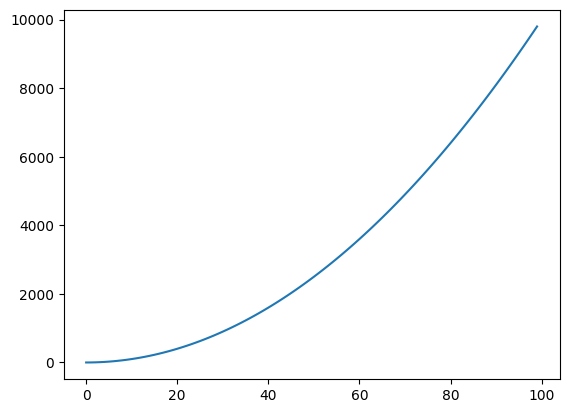

In [6]:
from IPython import display#这段代码使用了IPython的`display`模块中的`clear_output`函数，该函数的作用是清除当前输出区域的内容。其中，`wait=True`参数指定在清除输出前等待新的输出。
from matplotlib import pyplot as plt
xlist = []
ylist = []
for i in range(100):
    xlist.append(i)
    ylist.append(i**2)
    display.clear_output(wait=True)
    plt.plot(xlist,ylist)
    plt.show()
    plt.pause(0.1)#我们通常需要使用一个循环来不断更新图形，而在每次更新之后，我们需要暂停一段时间，以便观察图形的变化。plt.pause(0.1) 就是用来实现这个目的的函数。它会暂停程序的执行，直到时间到达指定的值（这里是 0.1 秒），然后继续执行程序。这样就可以实现动态图形的更新和显示了。

In [1]:
import gxl_tools
import torch
from IPython import display#这段代码使用了IPython的`display`模块中的`clear_output`函数，该函数的作用是清除当前输出区域的内容。其中，`wait=True`参数指定在清除输出前等待新的输出。
from matplotlib import pyplot as plt
class Animator():
    def __init__(self) -> None:
        self.elist = []
        self.alist = []
        self.blist = []
        self.clist = []
        display.clear_output(wait=True)
        L1 = plt.plot(self.elist,self.alist,label="train loss")
        L2 = plt.plot(self.elist,self.blist,label="train acc")
        L3 = plt.plot(self.elist,self.clist,label="test acc")
        plt.xlabel('epochs')
        plt.ylabel('number')
        plt.legend(loc='best')
        plt.show()
        plt.pause(0.1)
    def add(self,epoch,a,b,c):
        self.alist.append(a)
        self.blist.append(b)
        self.clist.append(c)
        self.elist.append(epoch)
        display.clear_output(wait=True)
        L1 = plt.plot(self.elist,self.alist,label="train loss")
        L2 = plt.plot(self.elist,self.blist,label="train acc")
        L3 = plt.plot(self.elist,self.clist,label="test acc")
        plt.xlabel('epochs')
        plt.ylabel('number')
        plt.legend(loc='best')
        plt.show()
        plt.pause(0.1)
        
# animator = Animator()
# for i in range(10):
    # animator.add(i,i**2,i**2*3-321,i*10)

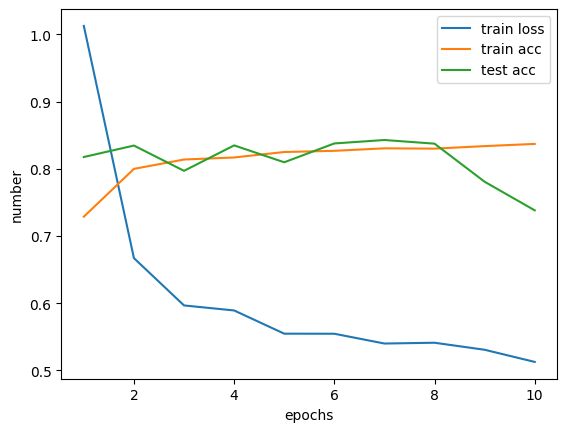

In [2]:
def start_train_for_one_epoch(net,loss,optimizer,train_iter):
    """开始一个epoch的训练"""
    if(isinstance(net,torch.nn.Module)):
        net.train()# 开启训练模式
    metric = gxl_tools.Accumulator(3)# 累计损失 , 累计错误数, 总数
    for X,y in train_iter:
        y_hat = net(X)
        l = loss(y_hat,y)
        if(isinstance(optimizer,torch.optim.Optimizer)):
            optimizer.zero_grad()
            l.mean().backward()
            optimizer.step()
        else:
            l.mean().backward()
            optimizer()
        metric.add(float(l.sum()),gxl_tools.accuracy_for_right_number(y_hat,y),y.numel())
    # print(f'loss : {metric[0]/metric[2]} accuracy : {metric[1]/metric[2]}')
    return float(metric[0]/metric[2]),float(metric[1]/metric[2])
def train_for_some_epoch(epoch_num,net,loss,optimizer,train_iter,test_iter):
    """开始全程训练,带动画展示过程"""
    animator = Animator()
    for epoch in range(1,epoch_num+1):
        train_loss ,train_acc = start_train_for_one_epoch(net,loss,optimizer,train_iter)
        test_acc = gxl_tools.evaluate_accuracy_for_net(net,test_iter)
        animator.add(epoch,train_loss,train_acc,test_acc)
        
batch_size = 256
train_iter ,test_iter = gxl_tools.load_data_iter_of_fashion_mnist(batch_size=batch_size)
num_input = 784
num_output = 10
W = gxl_tools.init_data_normal_for_torch(0,0.01,(num_input,num_output))
b = gxl_tools.init_data_zeros_for_torch(num_output)
net = gxl_tools.softmax_mode(W,b)
loss = gxl_tools.cross_entropy_loss
optimizer = gxl_tools.sgd([W,b],lr=0.3)
train_for_some_epoch(10,net,loss,optimizer,train_iter,test_iter)



torch.Size([256, 1, 28, 28])


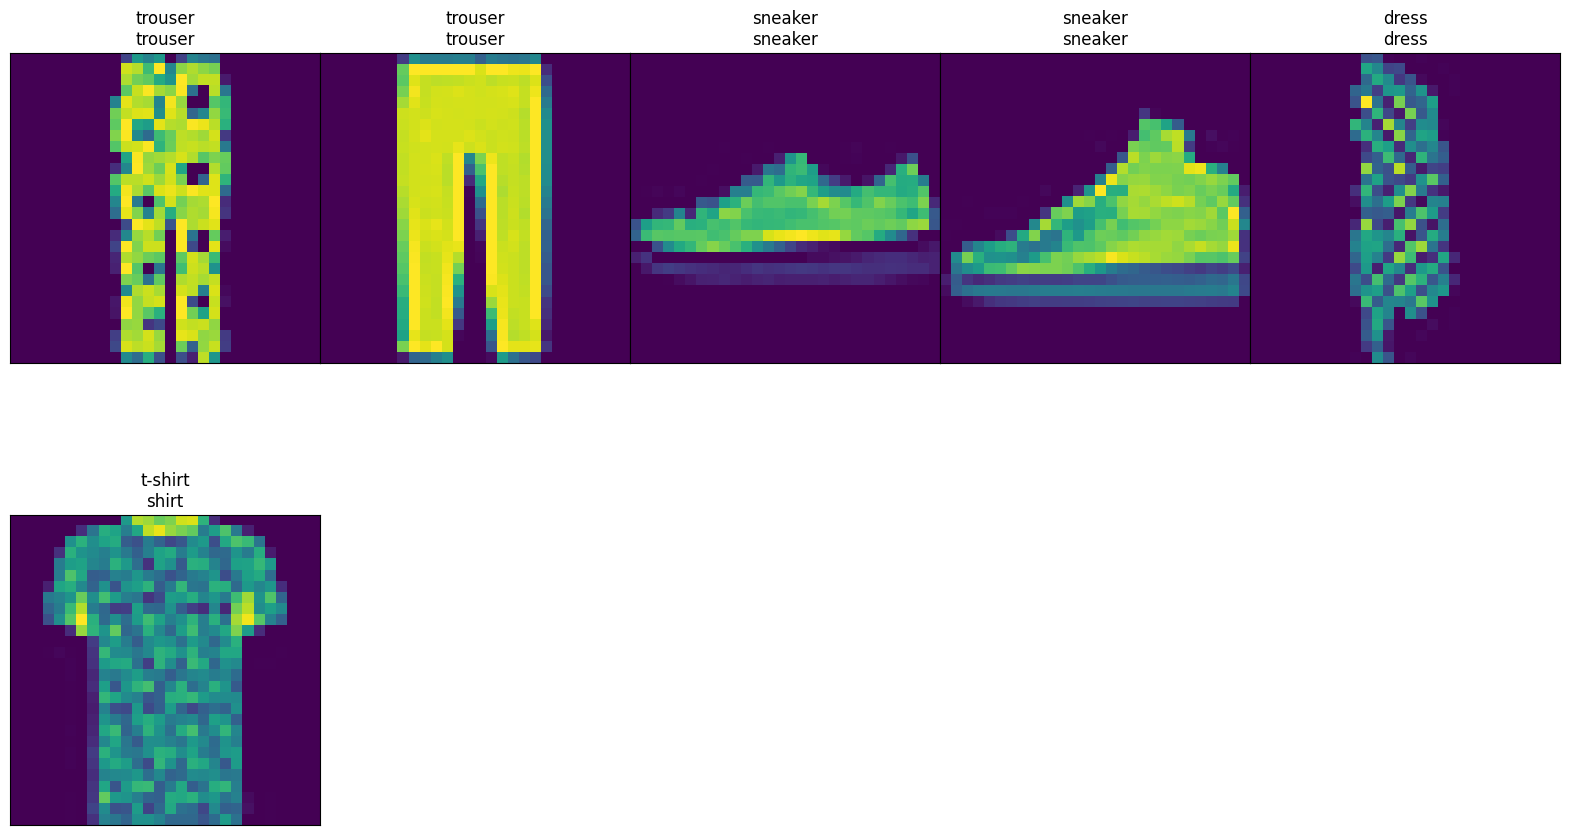

In [8]:
def predict_for_mnist_in_ch3(net,test_iter,n=6):
    for X,y in test_iter:
        break
    print(X.shape)
    labels = gxl_tools.get_fashion_mnist_labels(y)
    labels_hat = gxl_tools.get_fashion_mnist_labels(net(X).argmax(axis=1))
    labels_gather = [true+"\n"+pred for true,pred in zip(labels,labels_hat)]
    gxl_tools.show_image_for_arrays(X[:n].reshape(n,28,28),labels_gather)


     

## softmax回归的简洁实现

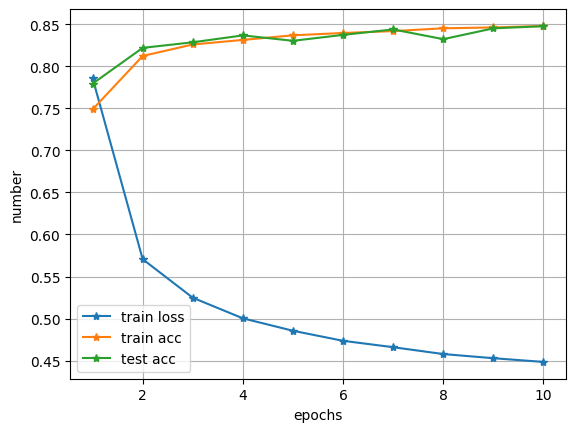

In [1]:
import torch
from torch import nn
import gxl_tools
batch_size = 256
train_iter,test_iter = gxl_tools.load_data_iter_of_fashion_mnist(batch_size)
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))
def weight_init(m):
    if(type(m) == nn.Linear):
        nn.init.normal_(m.weight,std=0.01)
net.apply(weight_init)
loss = nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)
epochs=10
gxl_tools.train_for_some_epoch(epochs,net,loss,optimizer,train_iter,test_iter)